In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
import prophet
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")

/Users/RJS/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
data = pd.read_csv('../data/regional_univariate_data.csv')
enc = pd.read_csv('../data/regional_datasets/univariate/enc_data_univ.csv').drop(columns = 'Unnamed: 0')
esc = pd.read_csv('../data/regional_datasets/univariate/esc_data_univ.csv').drop(columns = 'Unnamed: 0')
midatl = pd.read_csv('../data/regional_datasets/univariate/mid_atlantic_data_univ.csv').drop(columns = 'Unnamed: 0')
mount = pd.read_csv('../data/regional_datasets/univariate/mountain_data_univ.csv').drop(columns = 'Unnamed: 0')
ne = pd.read_csv('../data/regional_datasets/univariate/new_england_data_univ.csv').drop(columns = 'Unnamed: 0')
pac = pd.read_csv('../data/regional_datasets/univariate/pacific_data_univ.csv').drop(columns = 'Unnamed: 0')
satl = pd.read_csv('../data/regional_datasets/univariate/south_atlantic_data_univ.csv').drop(columns = 'Unnamed: 0')
wnc = pd.read_csv('../data/regional_datasets/univariate/wnc_data_univ.csv').drop(columns = 'Unnamed: 0')
wsc = pd.read_csv('../data/regional_datasets/univariate/wsc_data_univ.csv').drop(columns = 'Unnamed: 0')

In [13]:
esc.set_index('date')

,region,new_confirmed,1_day_shift,7_day_avg,2_day_shift,3_day_shift,7_day_shift
date,,,,,,,
2020-01-22,East South Central,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-23,East South Central,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-24,East South Central,0.0,0.0,NaN,0.0,NaN,NaN
2020-01-25,East South Central,0.0,0.0,NaN,0.0,0.0,NaN
2020-01-26,East South Central,0.0,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
2022-09-11,East South Central,377.0,0.0,5886.000000,6364.0,4181.0,214.0
2022-09-12,East South Central,12381.0,377.0,7635.285714,0.0,6364.0,136.0
2022-09-13,East South Central,8680.0,12381.0,4886.142857,377.0,0.0,27924.0


22:02:27 - cmdstanpy - INFO - Chain [1] start processing


22:02:27 - cmdstanpy - INFO - Chain [1] done processing
22:02:27 - cmdstanpy - INFO - Chain [1] start processing
22:02:27 - cmdstanpy - INFO - Chain [1] done processing
22:02:27 - cmdstanpy - INFO - Chain [1] start processing
22:02:27 - cmdstanpy - INFO - Chain [1] done processing
22:02:27 - cmdstanpy - INFO - Chain [1] start processing
22:02:27 - cmdstanpy - INFO - Chain [1] done processing
22:02:28 - cmdstanpy - INFO - Chain [1] start processing
22:02:28 - cmdstanpy - INFO - Chain [1] done processing
22:02:28 - cmdstanpy - INFO - Chain [1] start processing
22:02:28 - cmdstanpy - INFO - Chain [1] done processing
22:02:28 - cmdstanpy - INFO - Chain [1] start processing
22:02:28 - cmdstanpy - INFO - Chain [1] done processing
22:02:29 - cmdstanpy - INFO - Chain [1] start processing
22:02:29 - cmdstanpy - INFO - Chain [1] done processing
22:02:29 - cmdstanpy - INFO - Chain [1] start processing
22:02:29 - cmdstanpy - INFO - Chain [1] done processing


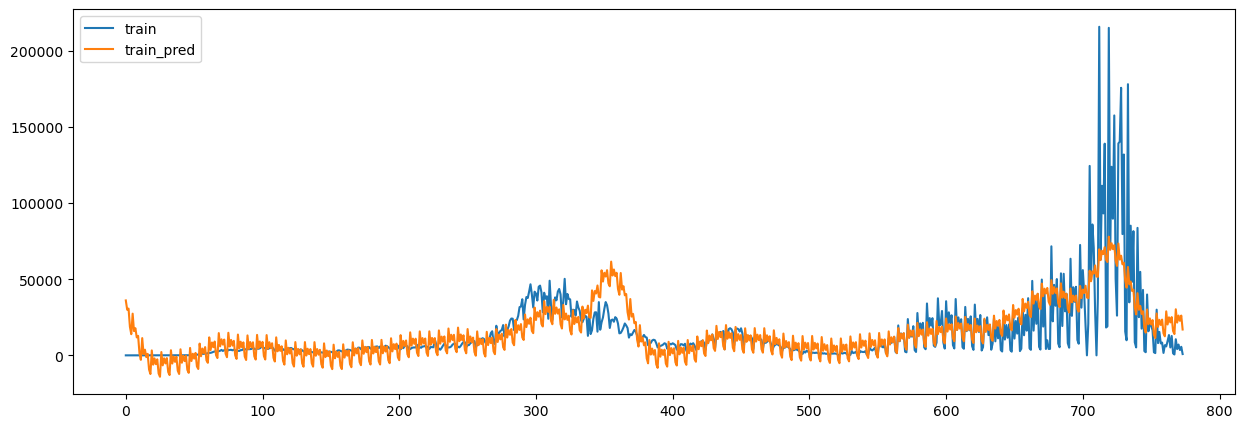

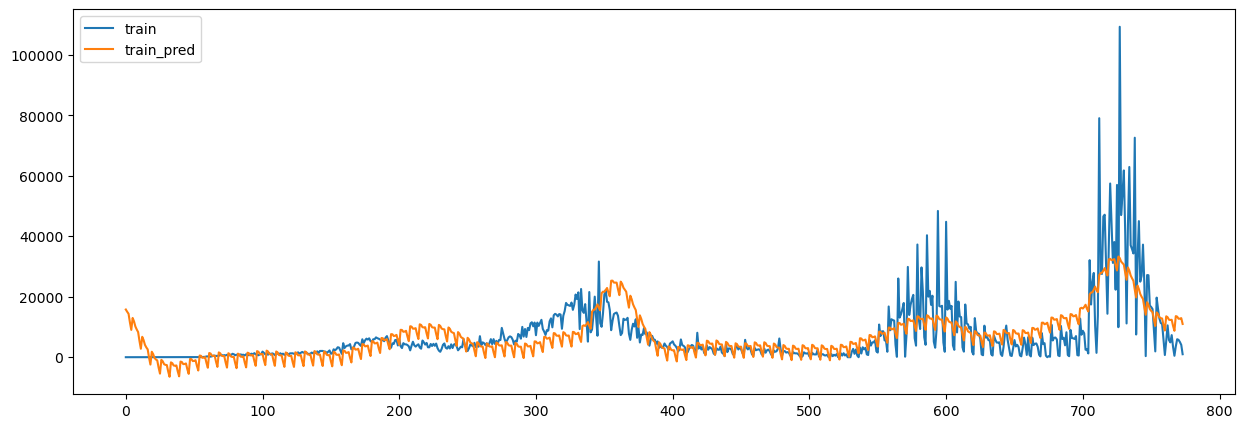

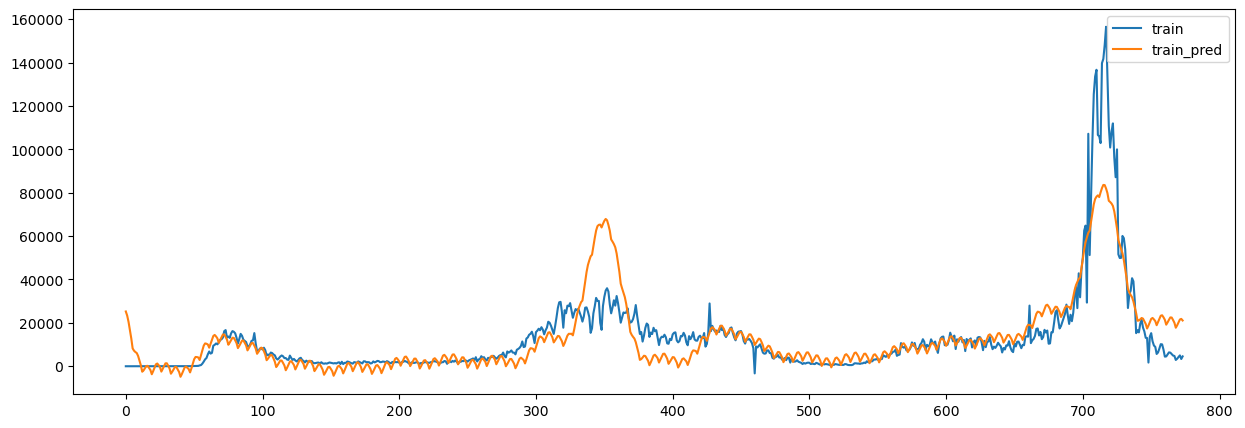

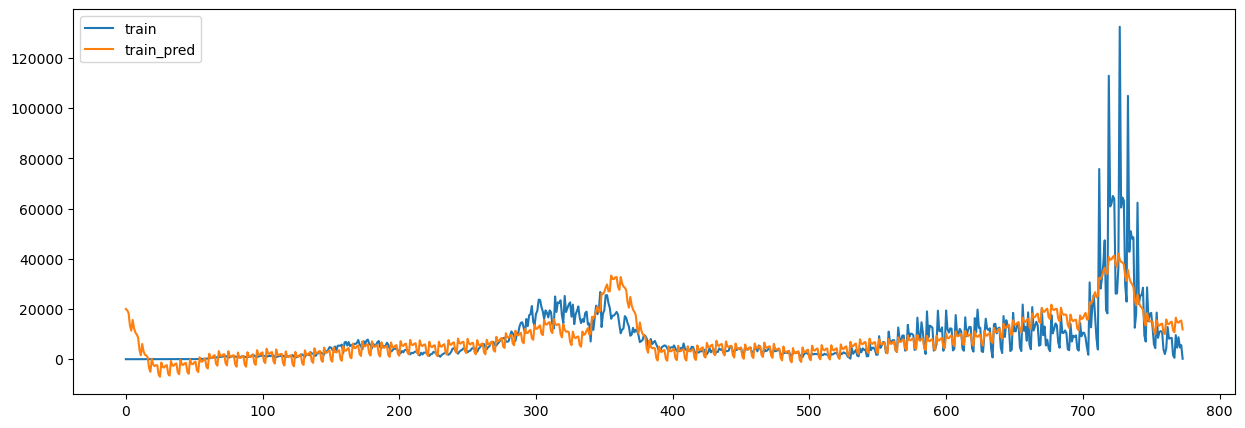

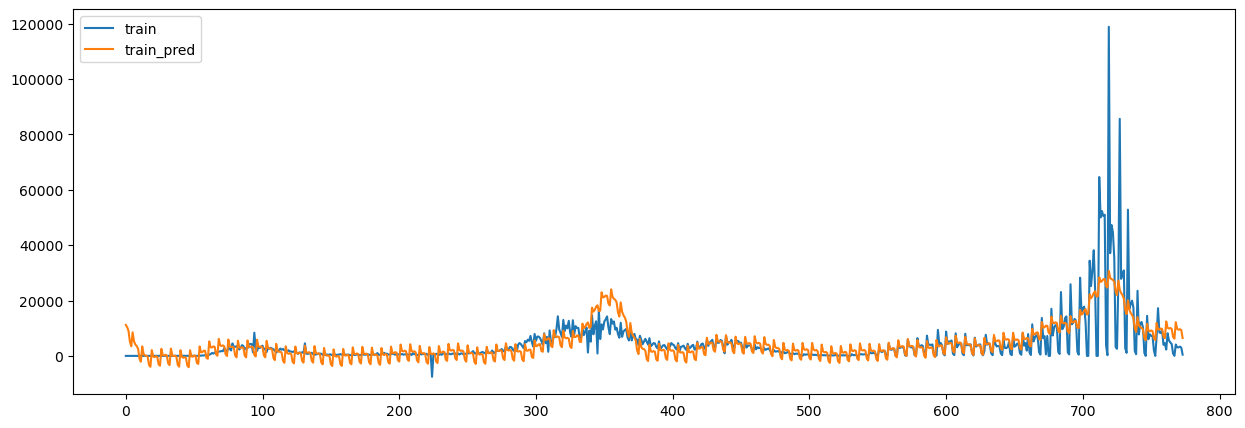

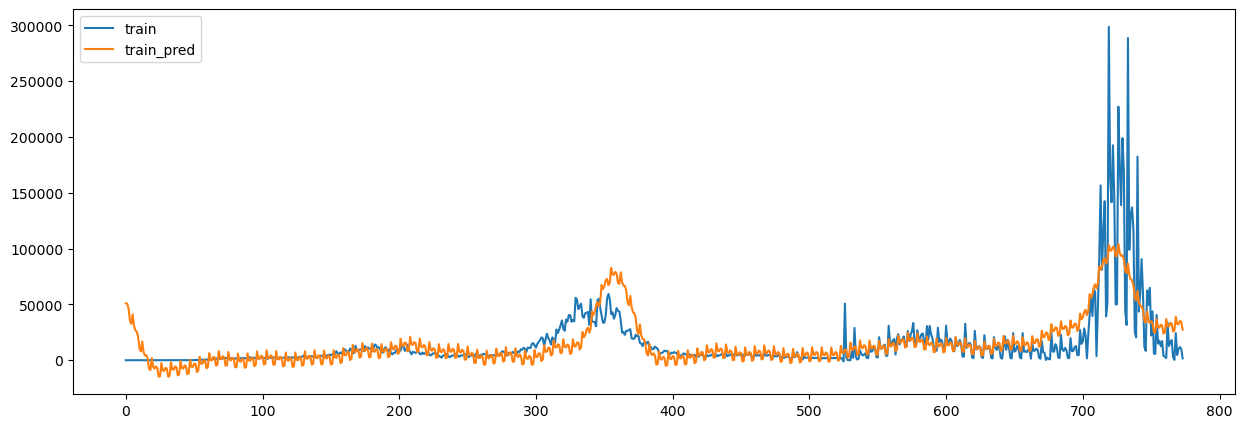

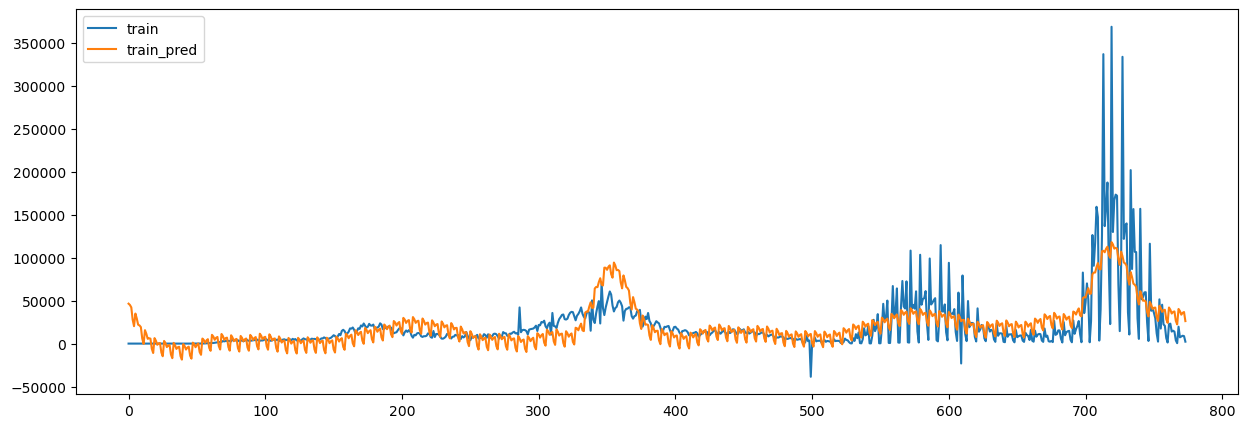

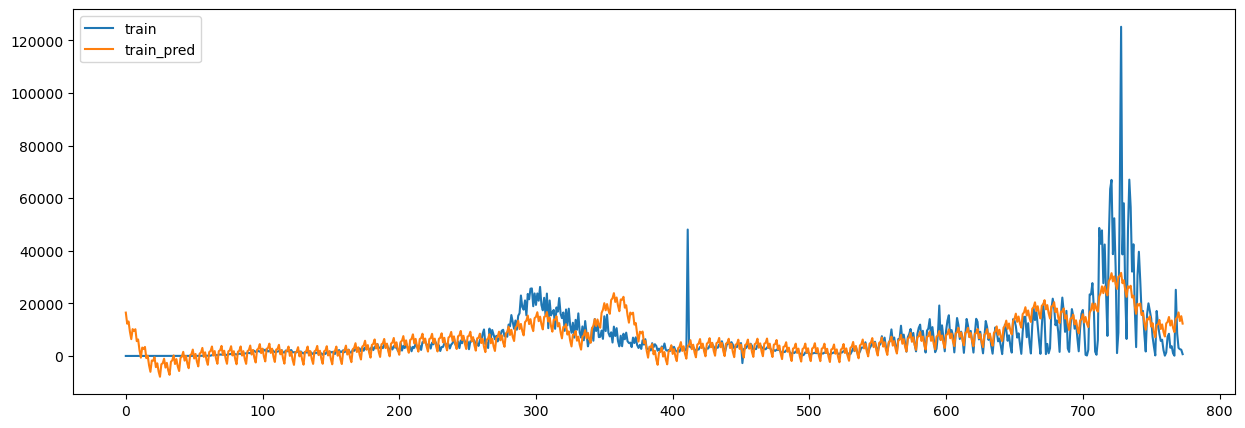

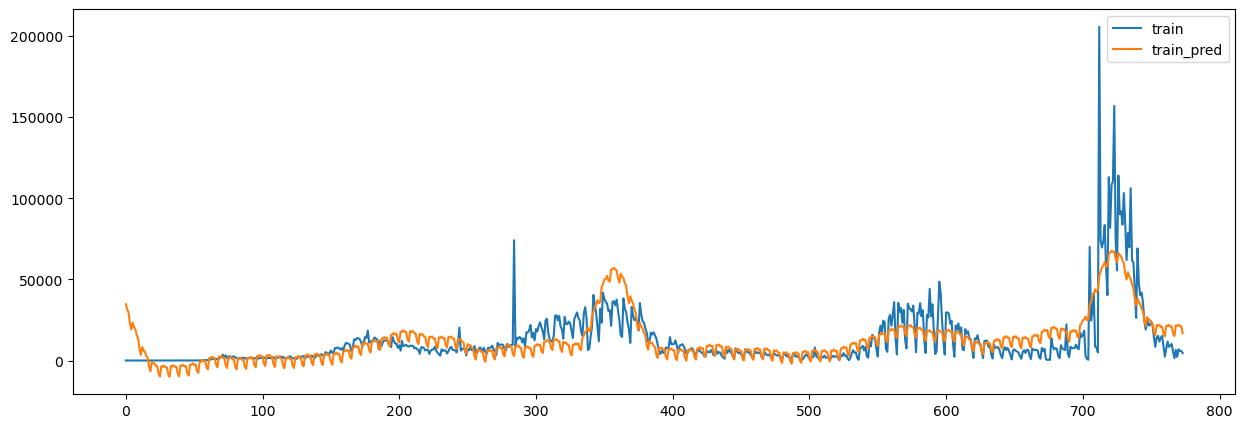

In [31]:
for data in [enc, esc, midatl, mount, ne, pac, satl, wnc, wsc]:
    data = data[['date', 'new_confirmed']].rename(columns = {'date': 'ds', 'new_confirmed': 'y'})
    size = round(data.shape[0]*0.2)
    train = data.iloc[:-size]
    test = data.iloc[-size:]
    model = prophet.Prophet().fit(train)
    train_pred = model.predict(train)
    pd.concat([train,train_pred['yhat']], axis=1).plot(figsize=(15,5)) 
    plt.legend(['train', 'train_pred'])

In [37]:
pd.concat([test,test_pred['yhat']], axis=1)

,index,ds,y,yhat
0,774,2022-03-06,828.0,15245.516594
1,775,2022-03-07,4373.0,21964.867447
2,776,2022-03-08,7669.0,21738.947678
3,777,2022-03-09,6091.0,22554.083825
4,778,2022-03-10,6682.0,21557.443406
...,...,...,...,...
189,963,2022-09-11,0.0,34288.634169
190,964,2022-09-12,20617.0,41011.717576
191,965,2022-09-13,4988.0,40752.259146
192,966,2022-09-14,11344.0,41486.670598


09:18:19 - cmdstanpy - INFO - Chain [1] start processing
09:18:19 - cmdstanpy - INFO - Chain [1] done processing
09:18:19 - cmdstanpy - INFO - Chain [1] start processing
09:18:19 - cmdstanpy - INFO - Chain [1] done processing
09:18:19 - cmdstanpy - INFO - Chain [1] start processing
09:18:19 - cmdstanpy - INFO - Chain [1] done processing
09:18:19 - cmdstanpy - INFO - Chain [1] start processing
09:18:19 - cmdstanpy - INFO - Chain [1] done processing
09:18:19 - cmdstanpy - INFO - Chain [1] start processing
09:18:19 - cmdstanpy - INFO - Chain [1] done processing
09:18:19 - cmdstanpy - INFO - Chain [1] start processing
09:18:19 - cmdstanpy - INFO - Chain [1] done processing
09:18:19 - cmdstanpy - INFO - Chain [1] start processing
09:18:19 - cmdstanpy - INFO - Chain [1] done processing
09:18:20 - cmdstanpy - INFO - Chain [1] start processing
09:18:20 - cmdstanpy - INFO - Chain [1] done processing
09:18:20 - cmdstanpy - INFO - Chain [1] start processing
09:18:20 - cmdstanpy - INFO - Chain [1]

<Figure size 640x480 with 0 Axes>

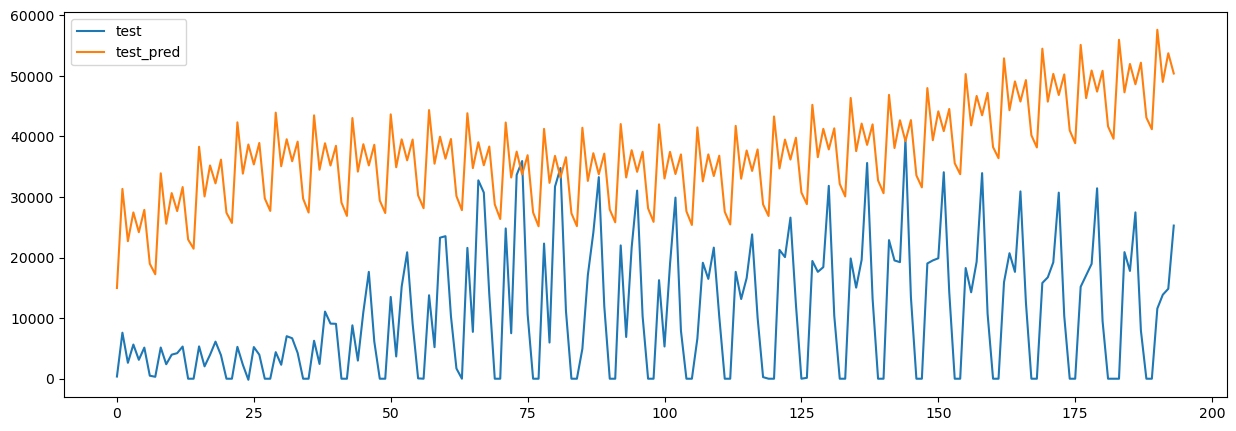

<Figure size 640x480 with 0 Axes>

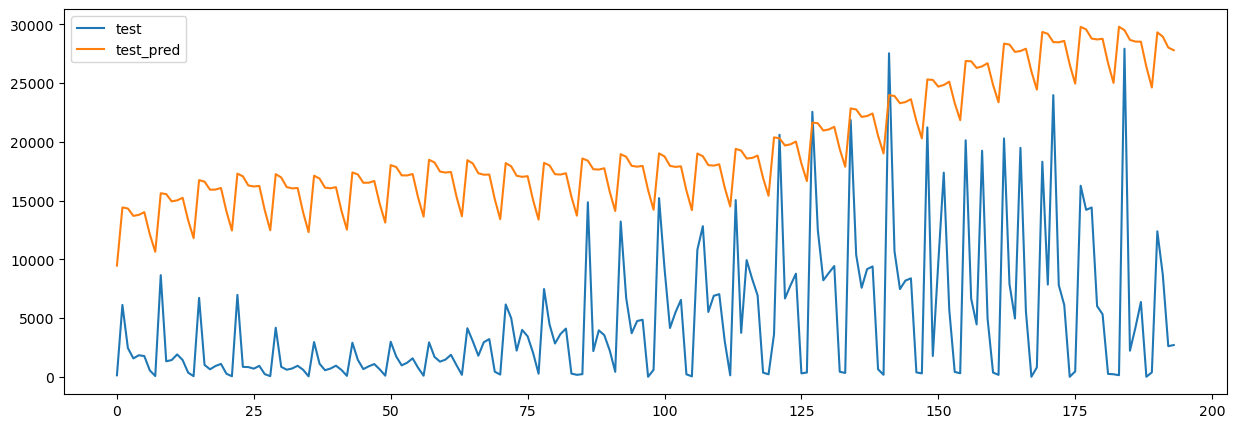

<Figure size 640x480 with 0 Axes>

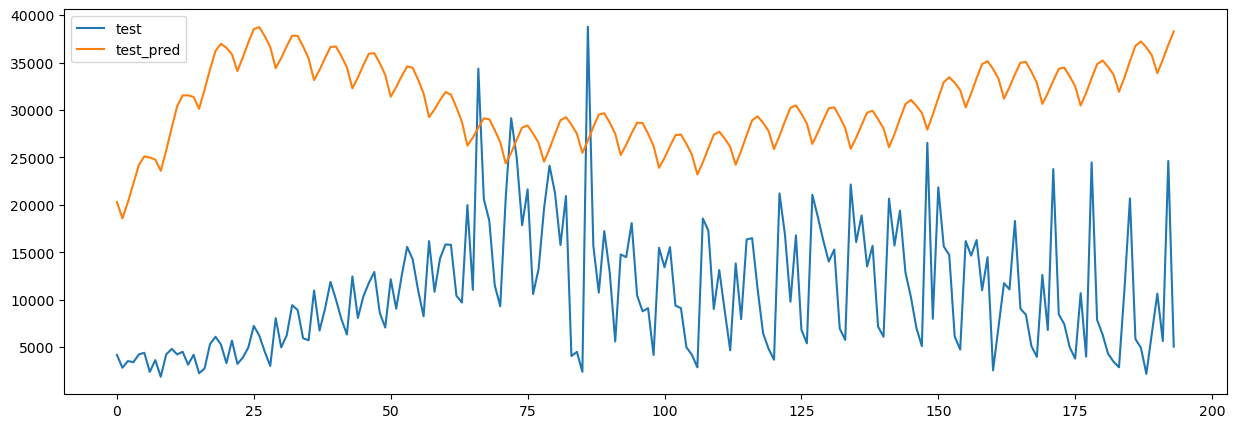

<Figure size 640x480 with 0 Axes>

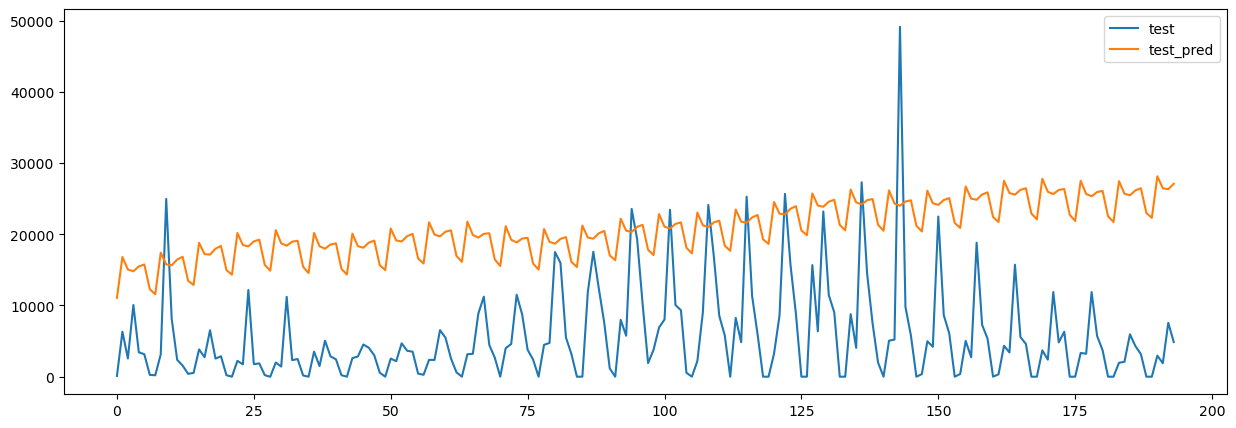

<Figure size 640x480 with 0 Axes>

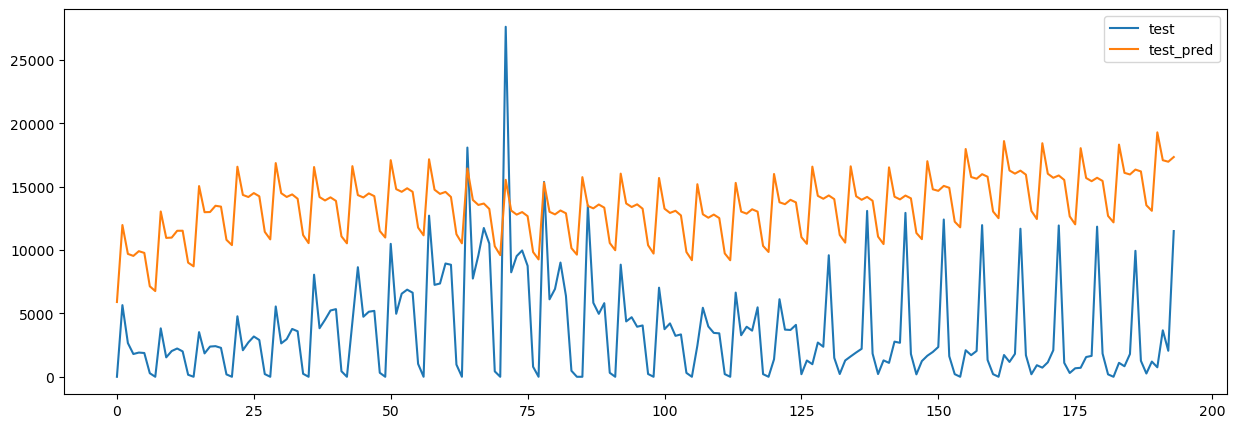

<Figure size 640x480 with 0 Axes>

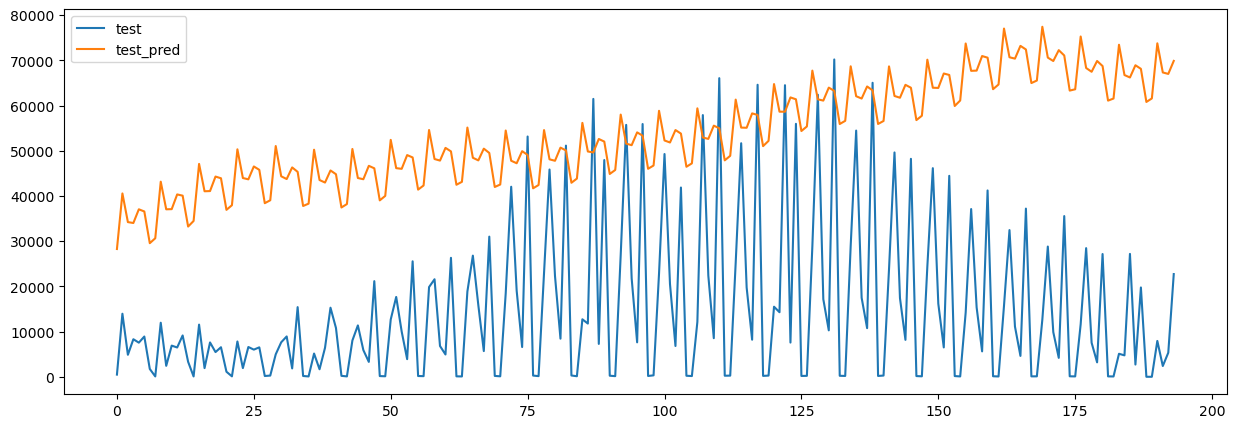

<Figure size 640x480 with 0 Axes>

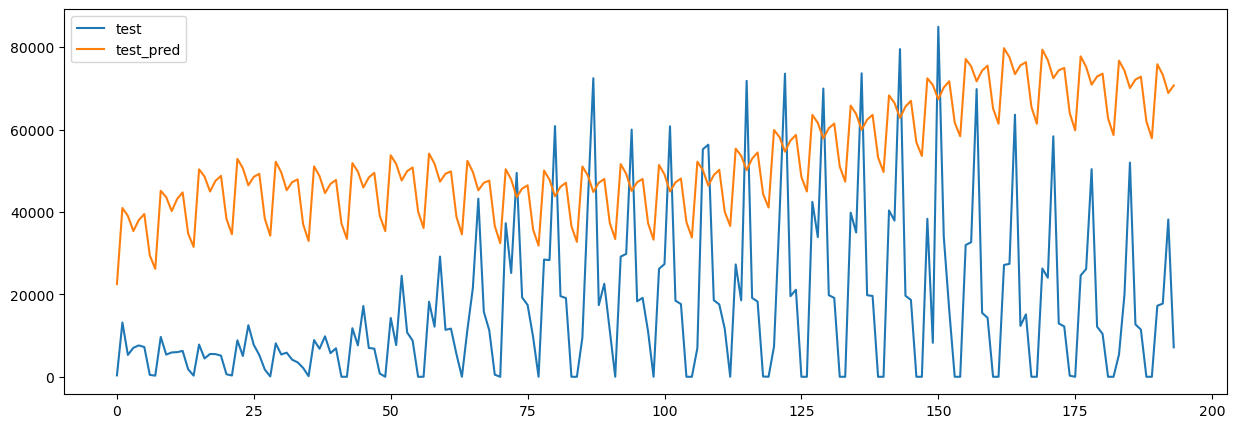

<Figure size 640x480 with 0 Axes>

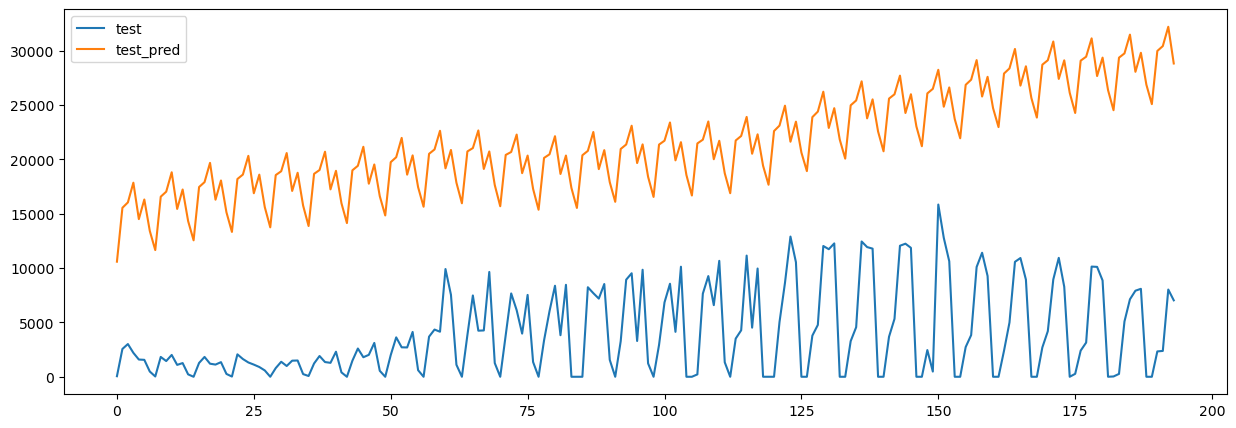

<Figure size 640x480 with 0 Axes>

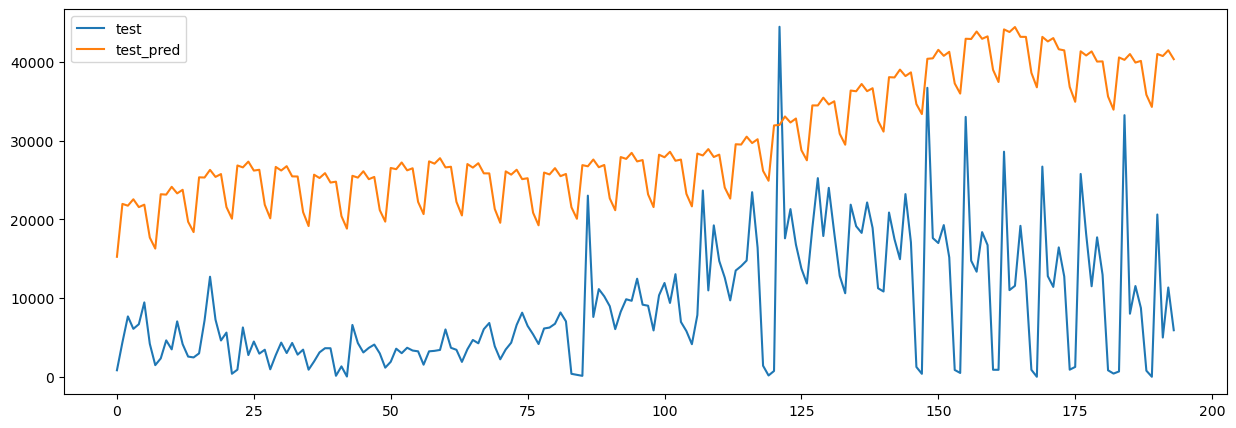

In [42]:
for data in [enc, esc, midatl, mount, ne, pac, satl, wnc, wsc]:
    data = data[['date', 'new_confirmed']].rename(columns = {'date': 'ds', 'new_confirmed': 'y'})
    size = round(data.shape[0]*0.2)
    train = data.iloc[:-size]
    test = data.iloc[-size:].reset_index().drop(columns = 'index')
    model = prophet.Prophet().fit(train)
    test_pred = model.predict(test)
    plt.figure()
    pd.concat([test,test_pred['yhat']], axis=1).plot(figsize=(15,5)) 
    plt.legend(['test', 'test_pred'])